In [27]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

The dataset comprises images of concrete structures, with a focus on identifying the presence or absence of cracks. The data is categorized into two subsets: negative, representing images without cracks, and positive, representing images with cracks.

In [28]:
!unzip 'concrete.zip' -d concrete


Archive:  concrete.zip
replace concrete/concrete/P_19963.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: concrete/concrete/P_19963.jpg  
  inflating: concrete/__MACOSX/concrete/._P_19963.jpg  
  inflating: concrete/concrete/N_19769.jpg  
  inflating: concrete/__MACOSX/concrete/._N_19769.jpg  
  inflating: concrete/concrete/P_19977.jpg  
  inflating: concrete/__MACOSX/concrete/._P_19977.jpg  
  inflating: concrete/concrete/N_19741.jpg  
  inflating: concrete/__MACOSX/concrete/._N_19741.jpg  
  inflating: concrete/concrete/N_19755.jpg  
  inflating: concrete/__MACOSX/concrete/._N_19755.jpg  
  inflating: concrete/concrete/N_19782.jpg  
  inflating: concrete/__MACOSX/concrete/._N_19782.jpg  
  inflating: concrete/concrete/N_19796.jpg  
  inflating: concrete/__MACOSX/concrete/._N_19796.jpg  
  inflating: concrete/concrete/P_19988.jpg  
  inflating: concrete/__MACOSX/concrete/._P_19988.jpg  
  inflating: concrete/concrete/P_19817.jpg  
  inflating: concrete/__MACOSX/concrete/._P_1

In [29]:
dat = '/content/concrete/concrete/'


In [30]:
image_files = [os.path.join(dat, file) for file in os.listdir(dat) if file.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))]

images = [np.array(Image.open(file).convert('L').resize((64, 64))) for file in image_files]

data = np.array([image.flatten() for image in images])  #Returns 1D array
data

array([[201, 198, 204, ..., 202, 204, 198],
       [213, 212, 212, ..., 202, 196, 201],
       [169, 173, 170, ..., 167, 167, 164],
       ...,
       [197, 201, 198, ..., 184, 182, 183],
       [206, 209, 204, ..., 195, 197, 196],
       [201, 200, 197, ..., 190, 190, 189]], dtype=uint8)

In [31]:
data.shape

(400, 4096)

#Question 1

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
df = pca.fit_transform(data)

df

array([[-6.88512546e+02,  5.53382655e+02,  1.06262514e+03, ...,
         4.55100201e-18,  3.92751469e-16,  4.47814496e-18],
       [-2.28908903e+03,  1.02593344e+02,  2.07325016e+01, ...,
         4.55100201e-18,  3.92751469e-16,  4.47814496e-18],
       [ 1.52107579e+03,  4.64050120e+02,  1.68945017e+03, ...,
         4.55100201e-18,  3.92751469e-16,  4.47814496e-18],
       ...,
       [-8.29951745e+02,  8.04887660e+02, -4.68173267e+02, ...,
         4.55100201e-18,  3.92751469e-16,  4.47814496e-18],
       [-1.91639239e+03, -1.28199630e+02, -1.03059097e+02, ...,
         4.55100201e-18,  3.92751469e-16,  4.47814496e-18],
       [-1.52665290e+03, -1.15413214e+02, -6.47498077e+00, ...,
         4.55100201e-18,  3.92751469e-16,  4.47814496e-18]])

In [33]:
variance = np.cumsum(pca.explained_variance_ratio_)
_95_variance = np.argmax(variance >= 0.95) + 1

print("Index of the first principal component that explains at least 95% of the variance:",_95_variance )


Index of the first principal component that explains at least 95% of the variance: 110


#Question 2

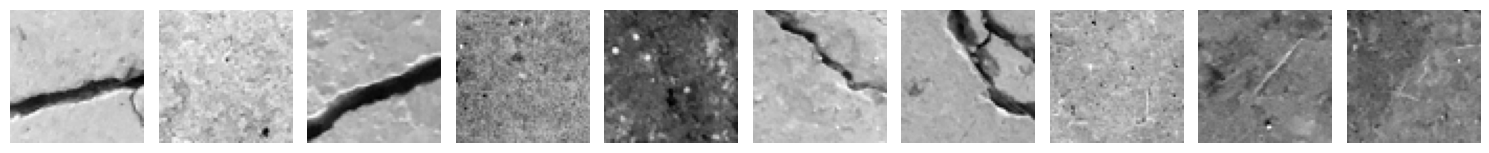

In [34]:
original_images = images[:10]

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


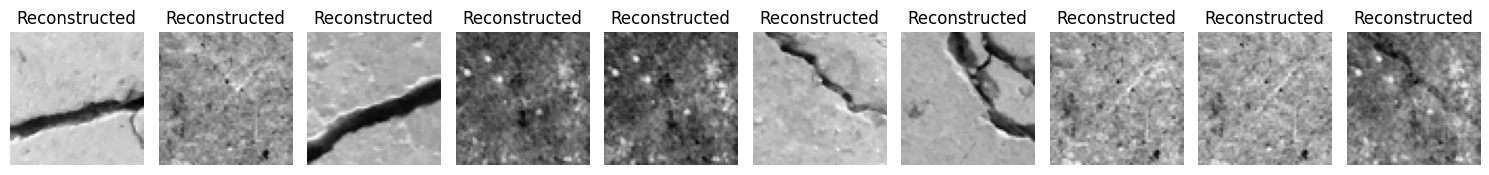

In [35]:
pca = PCA(n_components=0.95)
reduced_images = pca.fit_transform(data[:10])
reconstructed_images = pca.inverse_transform(reduced_images)

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i].reshape(64, 64), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Question 3A

In [36]:
pca_2 = PCA(n_components=2)
data2 = pca_2.fit_transform(data)

variance_explained = pca_2.explained_variance_ratio_.sum()
print("Explained variance of the first two principal components:", variance_explained)

Explained variance of the first two principal components: 0.5693133244038395


#Question 3B

In [37]:
data_directory = '/content/concrete/concrete/'

file_names = os.listdir(data_directory)

categories = [file.split('_')[0] for file in file_names]

print(categories)

['P', 'N', 'P', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'N', 'P', 'N', 'P', 'P', 'N', 'P', 'P', 'P', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'P', 'N', 'P', 'N', 'N', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'N', 'P', 'P', 'N', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'P', 'N', 'N', 'P', 'N', 'P', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'N', 'P', 'P', 'N', 'N', 'N', 'P', 'P', 'N', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'N',

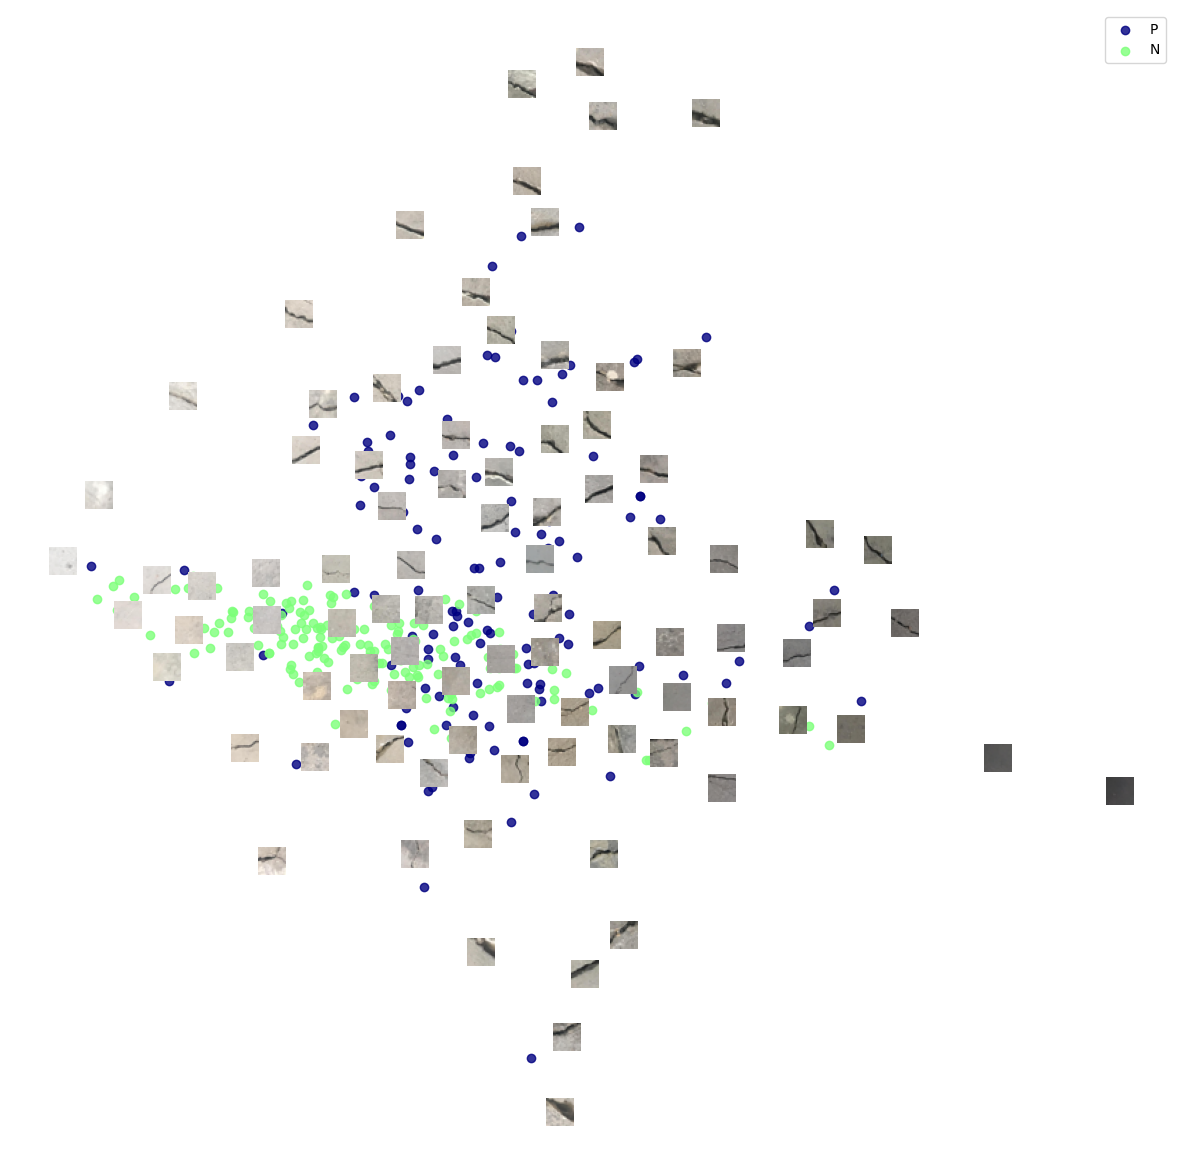

In [38]:
# PCA

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

X_normalized = MinMaxScaler().fit_transform(data2)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['P', 'N']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()

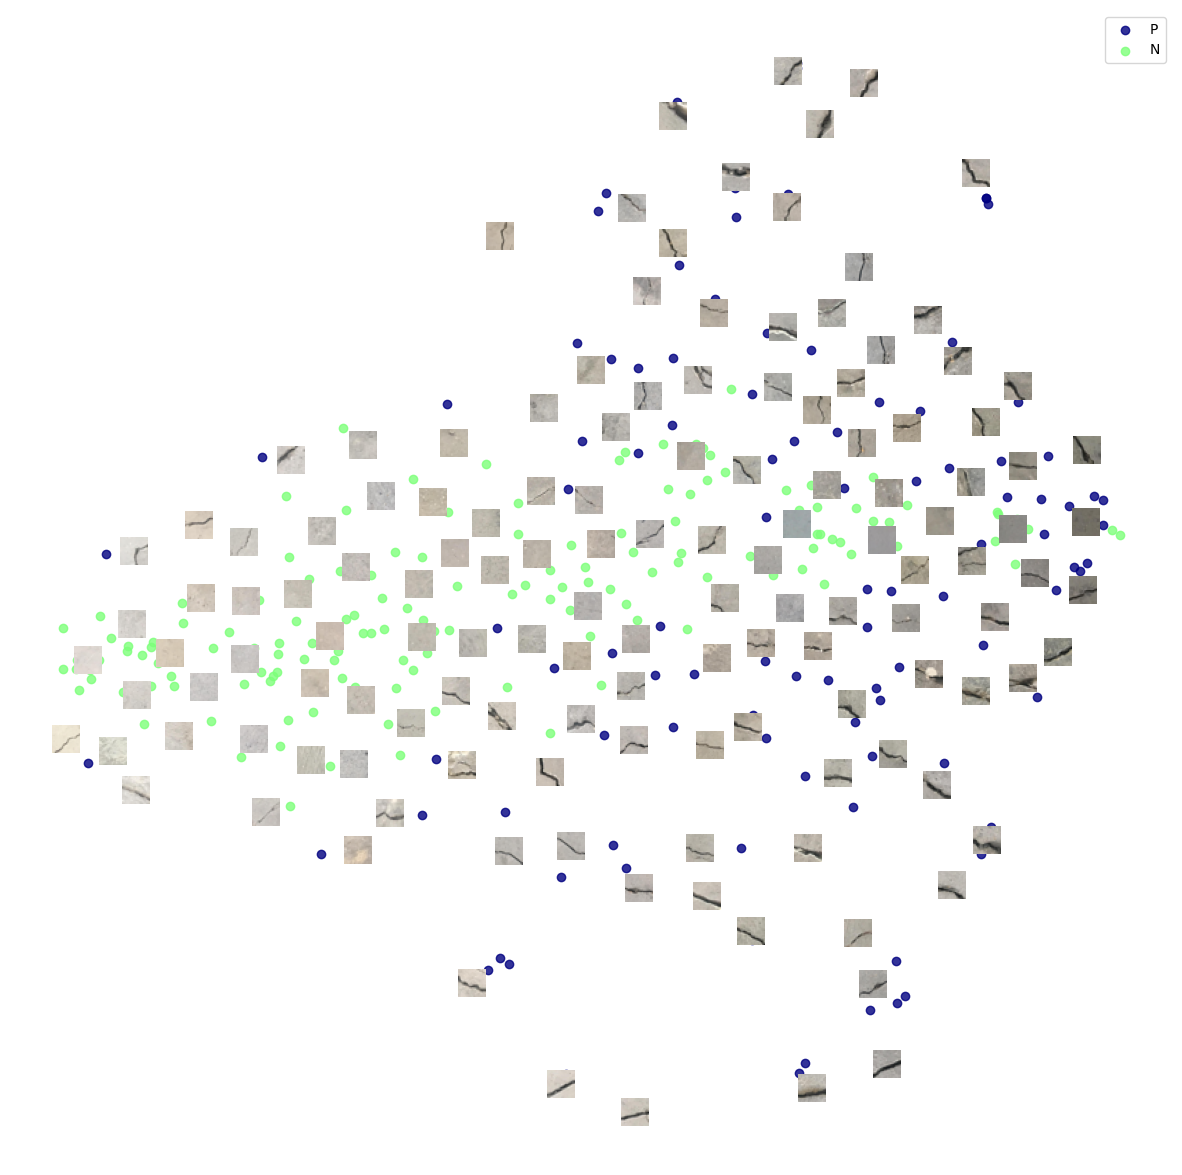

In [39]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

# t-SNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data)

X_normalized = MinMaxScaler().fit_transform(tsne_data)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['P', 'N']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()

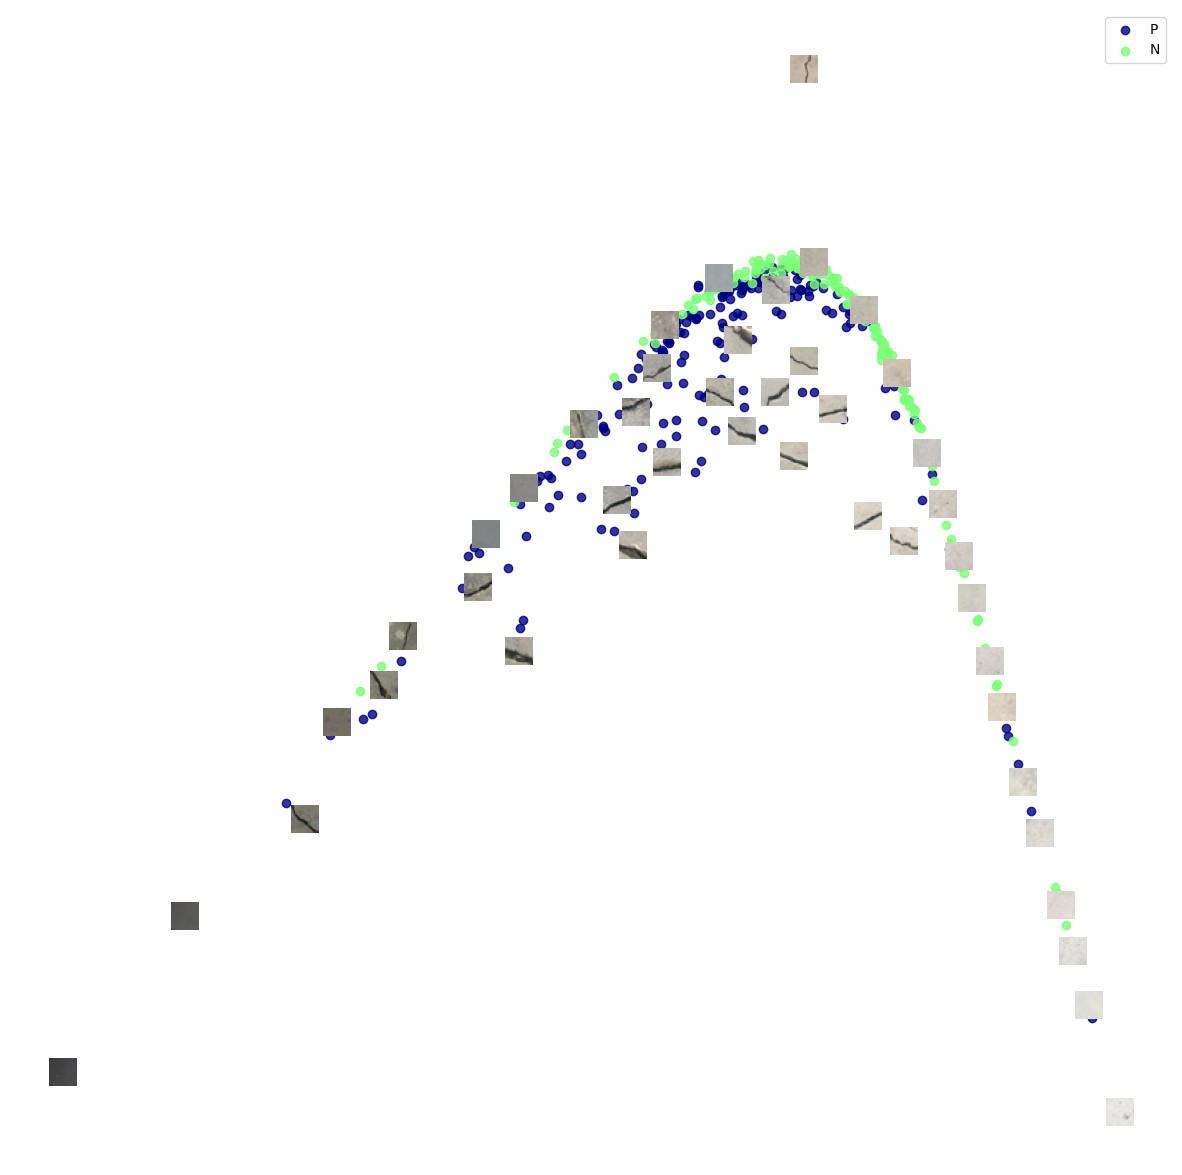

In [41]:
# LLE

lle = LocallyLinearEmbedding(n_neighbors=30, n_components=2, random_state=42)
lle_data = lle.fit_transform(data)

X_normalized = MinMaxScaler().fit_transform(lle_data)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['P', 'N']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()

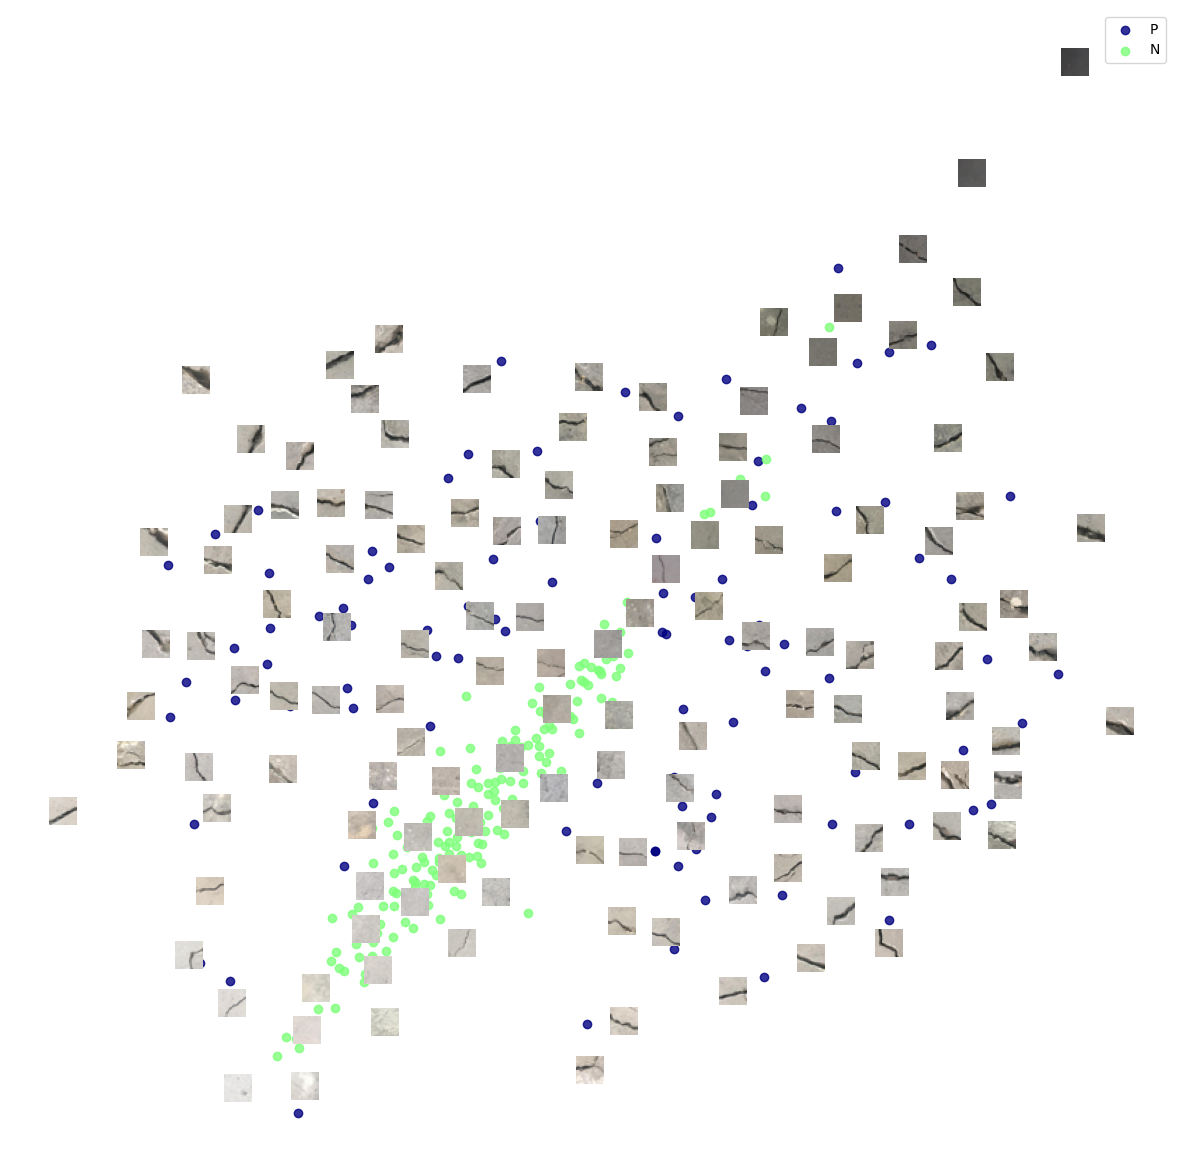

In [42]:
# MDS

mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(data)

X_normalized = MinMaxScaler().fit_transform(mds_data)

neighbors = np.array([[10., 10.]])

plt.figure(figsize=(15, 15))
cmap = plt.cm.jet
labels = ['P', 'N']

for label in labels:
    plt.scatter(X_normalized[np.array(categories) == label, 0],
                X_normalized[np.array(categories) == label, 1],
                c=[cmap(float(labels.index(label)) / len(labels))], label=label, alpha=0.8)

plt.axis("off")
ax = plt.gca()

for index, image_coord in enumerate(X_normalized):
    closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

    if closest_distance > 0.04:
        neighbors = np.r_[neighbors, [image_coord]]
        image_file_path = os.path.join(data_directory, file_names[index])
        image = Image.open(image_file_path).resize((20, 20))
        imagebox = AnnotationBbox(OffsetImage(image, cmap='gray'), image_coord, frameon=False, pad=0.1)
        ax.add_artist(imagebox)

plt.legend()
plt.show()

#Question 3C

Different dimensionality reduction techniques yield distinct visualizations. LLE exhibits overlap, indicating challenges in capturing intrinsic data structure or nonlinear relationships. MDS and t-SNE display scattered plots, demonstrating more effective separation. Notably, t-SNE excels in preserving local relationships, resulting in clearer representation and making it favorable for visualizing complex high-dimensional data.

#Question 5A

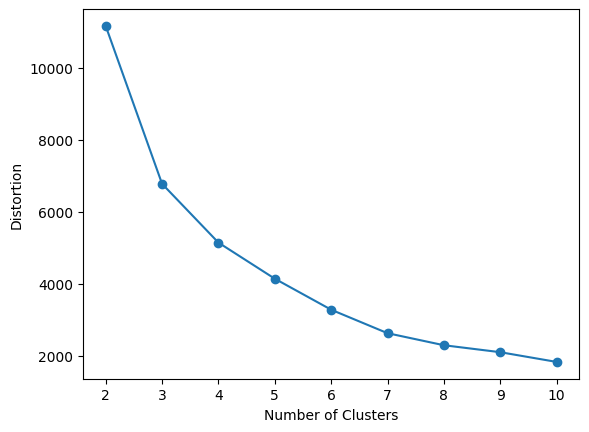

In [43]:
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [44]:
diff = np.diff(distortions)
elbow = np.argmin(diff) + 1
elbow + 2

3

I employed the elbow method to identify the optimal number of clusters for K-Means clustering. By fitting K-Means with varying values of k and plotting the distortion (inertia) against the number of clusters, it can be observed that the differences in consecutive distortions reached a noticeable inflection point, indicating an "elbow." This elbow point, occurring at 3 clusters, signifies the optimal number of clusters for the given dataset.

#Question 5B

In [45]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                              show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2", alpha=0.3)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')

    if show_centroids:
        centroids = clusterer.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=150, linewidths=3, color='r', zorder=10)


    plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, cmap='viridis', marker='.', alpha=0.7)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

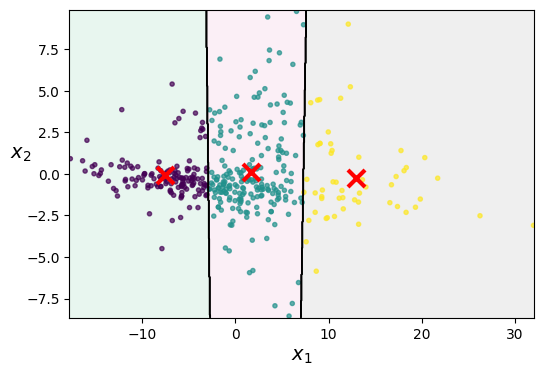

In [46]:
kmeans = KMeans(n_clusters=3, init="random", n_init=10, random_state=2)
kmeans.fit(pca_data)
plt.figure(figsize=(6, 4))
plot_decision_boundaries(kmeans, pca_data)
plt.show()

#Question 6A

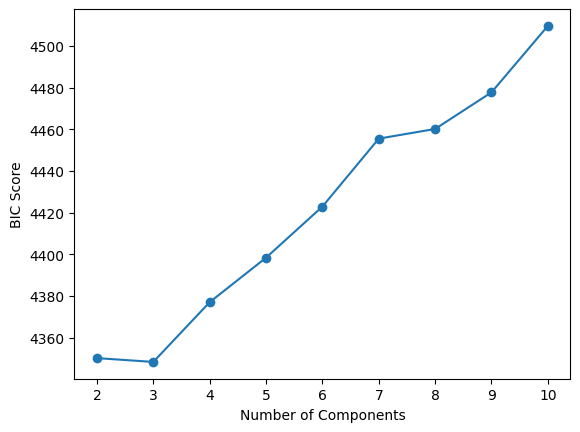

In [47]:
from sklearn.mixture import GaussianMixture

bic_scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=42)
    gmm.fit(pca_data)
    bic_scores.append(gmm.bic(pca_data))

plt.plot(range(2, 11), bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

In [48]:
best = np.argmin(bic_scores) + 2
best

3

Applied a Gaussian Mixture Model to the data, exploring a range of cluster numbers from 2 to 10. Utilizing the Bayesian Information Criterion (BIC) scores, I generated a plot illustrating the BIC scores for each model. By identifying the number of clusters associated with the minimum BIC score, determined by finding the index with the lowest BIC and adding 2 (due to the starting point of 2 clusters in the loop), it can be determined that the optimal number of clusters is 3.

#Question 6B

In [49]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                              show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2", alpha=0.3)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')

    if show_centroids:
        centroids = clusterer.means_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=150, linewidths=3, color='r', zorder=10)

    plt.scatter(X[:, 0], X[:, 1], c=clusterer.predict(X), cmap='viridis', marker='.', alpha=0.7)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

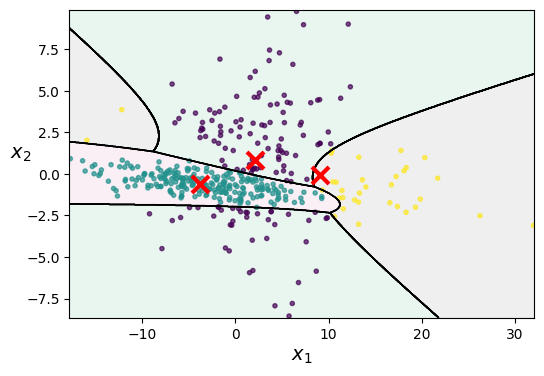

In [50]:

gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(pca_data)

plt.figure(figsize=(6, 4))
plot_decision_boundaries(gmm, pca_data)
plt.show()

#Question 6C

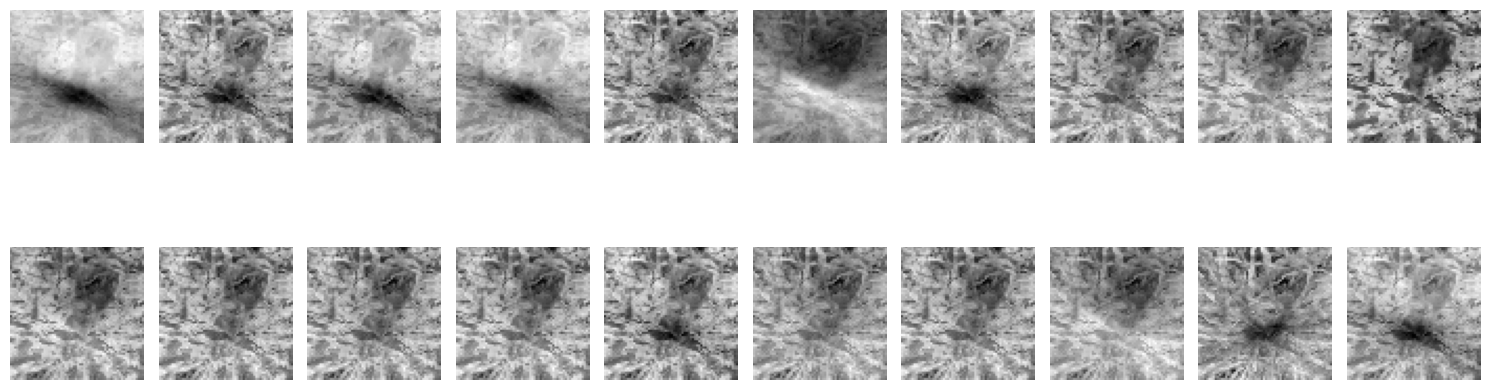

In [51]:
new_samples = gmm.sample(n_samples=20)[0]

new_samples_original = pca.inverse_transform(new_samples)


plt.figure(figsize=(15, 6))

for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(new_samples_original[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Question 7A

In [52]:
!unzip 'concrete_val.zip'
dat2 = 'concrete_val'

Archive:  concrete_val.zip
   creating: concrete_val/
  inflating: concrete_val/P_00017.jpg  
  inflating: __MACOSX/concrete_val/._P_00017.jpg  
  inflating: concrete_val/P_00003.jpg  
  inflating: __MACOSX/concrete_val/._P_00003.jpg  
  inflating: concrete_val/P_00002.jpg  
  inflating: __MACOSX/concrete_val/._P_00002.jpg  
  inflating: concrete_val/P_00016.jpg  
  inflating: __MACOSX/concrete_val/._P_00016.jpg  
  inflating: concrete_val/P_00028.jpg  
  inflating: __MACOSX/concrete_val/._P_00028.jpg  
  inflating: concrete_val/P_00014.jpg  
  inflating: __MACOSX/concrete_val/._P_00014.jpg  
  inflating: concrete_val/P_00015.jpg  
  inflating: __MACOSX/concrete_val/._P_00015.jpg  
  inflating: concrete_val/P_00001.jpg  
  inflating: __MACOSX/concrete_val/._P_00001.jpg  
  inflating: concrete_val/P_00029.jpg  
  inflating: __MACOSX/concrete_val/._P_00029.jpg  
  inflating: concrete_val/P_00005.jpg  
  inflating: __MACOSX/concrete_val/._P_00005.jpg  
  inflating: concrete_val/P_00011.jp

In [53]:
image_files = [os.path.join(dat2, file) for file in os.listdir(dat2) if file.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))]

images = [np.array(Image.open(file).convert('L').resize((64, 64))) for file in image_files]

data_val = np.array([image.flatten() for image in images])
data_val

array([[188, 196, 197, ..., 204, 198, 196],
       [128, 139, 144, ..., 157, 155, 158],
       [202, 184, 188, ..., 191, 193, 191],
       ...,
       [153, 154, 154, ..., 151, 152, 153],
       [191, 188, 185, ..., 190, 187, 190],
       [129, 124, 122, ..., 128, 130, 122]], dtype=uint8)

In [54]:
data_val.shape

(120, 4096)

In [55]:
data_directory = 'concrete_val'

file_names = os.listdir(data_directory)

categories1 = [file.split('_')[0] for file in file_names]

print(categories1)

['N', 'P', 'P', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'P', 'P', 'P', 'N', 'P', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'P', 'N', 'P', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'N', 'P', 'P', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'P', 'P', 'N', 'N']


In [56]:
df_train = pd.DataFrame(data)
df1_train = pd.DataFrame(data_val)
y1 = pd.DataFrame(categories, columns=['categories'])
y2 = pd.DataFrame(categories1, columns=['categories1'])

In [57]:
data_train = pd.concat([df_train, y1], axis=1)
data_train

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,categories
0,201,198,204,210,207,210,210,206,207,205,...,200,199,198,200,203,204,202,204,198,P
1,213,212,212,209,208,200,210,216,215,218,...,208,209,209,214,211,201,202,196,201,N
2,169,173,170,168,152,151,159,158,162,165,...,173,175,171,164,166,166,167,167,164,P
3,142,139,137,134,131,129,128,136,139,137,...,139,134,138,137,134,132,136,133,137,N
4,147,150,147,147,147,143,161,164,154,158,...,164,160,152,155,165,164,156,153,145,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,190,192,193,191,172,171,183,180,166,186,...,191,191,190,191,195,188,189,192,194,N
396,178,179,182,191,184,169,171,182,185,183,...,186,185,183,191,202,204,206,191,176,N
397,197,201,198,192,195,197,195,196,192,192,...,182,182,183,180,183,184,184,182,183,P
398,206,209,204,201,196,200,200,190,183,194,...,205,202,202,207,203,191,195,197,196,N


In [58]:
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]

X_train.shape, y_train.shape

((400, 4096), (400,))

In [59]:
val_data = pd.concat([df1_train, y2], axis=1)
val_data

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,categories1
0,188,196,197,196,186,186,206,220,190,159,...,200,202,203,202,203,206,204,198,196,N
1,128,139,144,144,143,145,148,148,158,158,...,154,152,149,147,150,155,157,155,158,P
2,202,184,188,203,218,226,213,206,204,206,...,193,194,195,193,193,189,191,193,191,P
3,157,158,171,168,154,160,163,162,164,164,...,150,147,150,161,158,156,155,153,152,P
4,207,193,177,181,209,198,179,176,183,190,...,188,191,187,186,191,204,191,189,183,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,165,165,158,159,158,160,160,165,164,166,...,157,159,157,153,156,160,160,161,155,N
116,133,132,134,133,130,130,128,130,131,134,...,136,136,136,136,138,138,135,135,137,P
117,153,154,154,155,155,157,157,159,152,152,...,151,149,147,147,152,153,151,152,153,P
118,191,188,185,180,190,168,159,185,194,193,...,194,195,196,194,192,192,190,187,190,N


In [60]:
X_val = val_data.iloc[:,:-1]
y_val = val_data.iloc[:,-1]

X_val.shape, y_val.shape

((120, 4096), (120,))

In [61]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

y_train_categorical = keras.utils.to_categorical(y_train_encoded)
y_val_categorical = keras.utils.to_categorical(y_val_encoded)

In [63]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
import time

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4096)),
    tf.keras.layers.Dense(512, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(256, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(8, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(2, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
start_time = time.time()
history = model.fit(X_train, y_train_categorical, epochs=100,
                    validation_data=(X_val, y_val_categorical),
                    callbacks=[early_stopping])
training_time = time.time() - start_time


print(f"Train time is {training_time} seconds")

Epoch 1/100
13/13 [==============================] - 3s 59ms/step - loss: 1.1326 - accuracy: 0.4675 - val_loss: 0.7720 - val_accuracy: 0.6167
Epoch 2/100
13/13 [==============================] - 0s 33ms/step - loss: 1.1219 - accuracy: 0.4950 - val_loss: 0.8671 - val_accuracy: 0.4917
Epoch 3/100
13/13 [==============================] - 0s 33ms/step - loss: 1.1810 - accuracy: 0.4500 - val_loss: 0.7865 - val_accuracy: 0.5000
Epoch 4/100
13/13 [==============================] - 0s 33ms/step - loss: 0.9656 - accuracy: 0.5500 - val_loss: 0.7555 - val_accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 34ms/step - loss: 1.0822 - accuracy: 0.5150 - val_loss: 0.7380 - val_accuracy: 0.4833
Epoch 6/100
13/13 [==============================] - 0s 35ms/step - loss: 1.0476 - accuracy: 0.4825 - val_loss: 0.7254 - val_accuracy: 0.4667
Epoch 7/100
13/13 [==============================] - 0s 37ms/step - loss: 1.0058 - accuracy: 0.5275 - val_loss: 0.7136 - val_accuracy: 0.5417
Epoch 

#Question 7B

In [64]:
valid_loss, valid_accuracy = model.evaluate(X_val, y_val_categorical)
print(f"Validation Loss = {valid_loss}")
print(f"Validation Accuracy = {valid_accuracy}")

4/4 [==============================] - 0s 12ms/step - loss: 0.6193 - accuracy: 0.5333
Validation Loss = 0.6192857623100281
Validation Accuracy = 0.5333333611488342


In [65]:
def get_parameters(model):
    bias = np.sum([np.prod(i.shape) for i in model.trainable_variables if 'bias' in i.name])
    print(f'Total parameters = {model.count_params()}')
    print(f'Total bias parameters = {bias}')

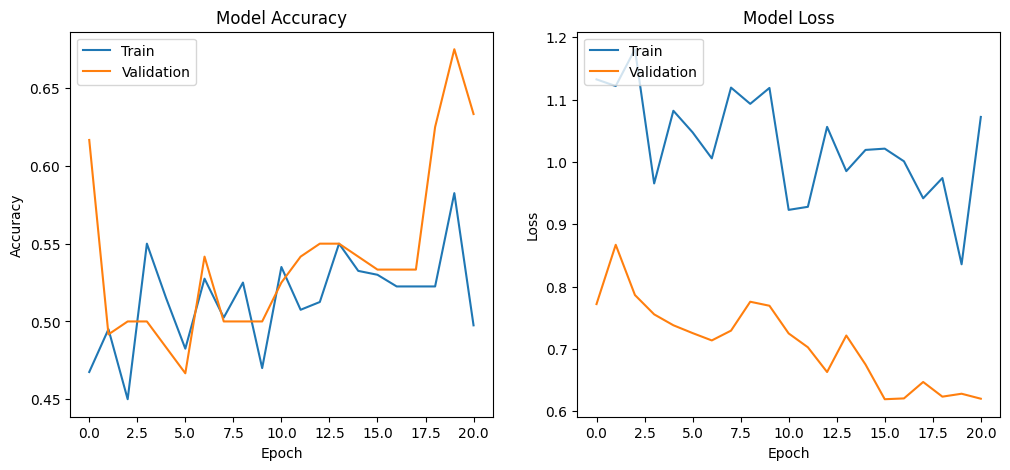

In [66]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#Question 7C

In [67]:
get_parameters(model)

Total parameters = 2266554
Total bias parameters = 906


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               2097664   
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_5 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 256)              

Conclusion -

The neural network, trained on a dataset with an overall accuracy of approximately 53.33%, demonstrated improved performance compared to the previous model. The validation loss was notably reduced to 0.619, indicative of enhanced predictive capabilities. The model architecture consisted of a total of 2,266,554 parameters, with 906 of them representing bias parameters. Despite the improvement in accuracy, it is essential to assess the model's generalization performance on new, unseen data. Regularization techniques, such as dropout or weight regularization, could be considered to further enhance the model's ability to generalize to diverse data instances. Additionally, monitoring the model's performance on a separate test set would provide a more comprehensive evaluation of its effectiveness.

References -

1. dataset - https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data

2. https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb

3. https://chat.openai.com/

4. https://stats.stackexchange.com/questions/233850/using-pca-on-an-image-dataset-prior-to-classification-with-a-neural-network